Name: Vilma Hietala
<br>Date: 19/01/2024
<br>Exploring & visualizing the data


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns
import math

#settings:
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 900)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', 1000)


In [2]:
data = pd.read_csv('train.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
data.describe(include='object').T

,count,unique,top,freq
Name,891,891,"Braund, Mr. Owen Harris",1
Sex,891,2,male,577
Ticket,891,681,347082,7
Cabin,204,147,B96 B98,4
Embarked,889,3,S,644


## How many survived (1 = survived)

In [5]:
data.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

## How many on board was female vs male:

In [6]:
data.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

## How gender affected survival:

In [7]:
survival_by_gender = data[["Sex", "Survived"]].groupby(["Sex"], as_index=False).mean().sort_values(by="Survived")

In [8]:
survival_by_gender

,Sex,Survived
1,male,0.188908
0,female,0.742038


## How class effected survival rate

In [9]:
data.Pclass.value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [10]:
survival_rate_by_class = data.groupby(['Pclass'], dropna=False)['Survived'].agg(['mean'])

In [11]:
survival_rate_by_class

,mean
Pclass,
1,0.629630
2,0.472826
3,0.242363


<Axes: title={'center': 'Mean Survival Rate By Class'}, ylabel='Pclass'>

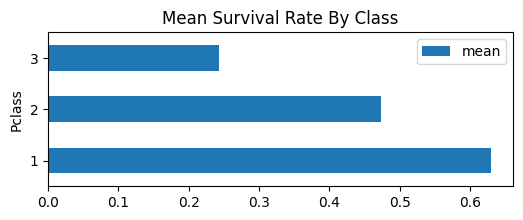

In [12]:
survival_rate_by_class.plot(kind='barh', figsize=(6,2), title="Mean Survival Rate By Class")

## How class and gender effected together

In [13]:
first_class_females = data.loc[(data["Pclass"]==1) & (data["Sex"]=='female')]
first_class_females.Survived.value_counts()

1    91
0     3
Name: Survived, dtype: int64

In [14]:
second_class_females = data.loc[(data["Pclass"]==2) & (data["Sex"]=='female')]
second_class_females.Survived.value_counts()

1    70
0     6
Name: Survived, dtype: int64

In [15]:
third_class_females = data.loc[(data["Pclass"]==3) & (data["Sex"]=='female')]
third_class_females.Survived.value_counts()

1    72
0    72
Name: Survived, dtype: int64

In [16]:
# creating DataFrame
data_visualization_f = pd.DataFrame({
    'First Class Females': [91, 3],
    'Second Class Females': [70, 6],
    'Third Class Females': [72, 72]
}, index=['Survived', 'Not Survived'])


In [17]:
data_visualization_f

,First Class Females,Second Class Females,Third Class Females
Survived,91,70,72
Not Survived,3,6,72


<Axes: title={'center': 'Survival Rate By Class (Females) Value Counts'}>

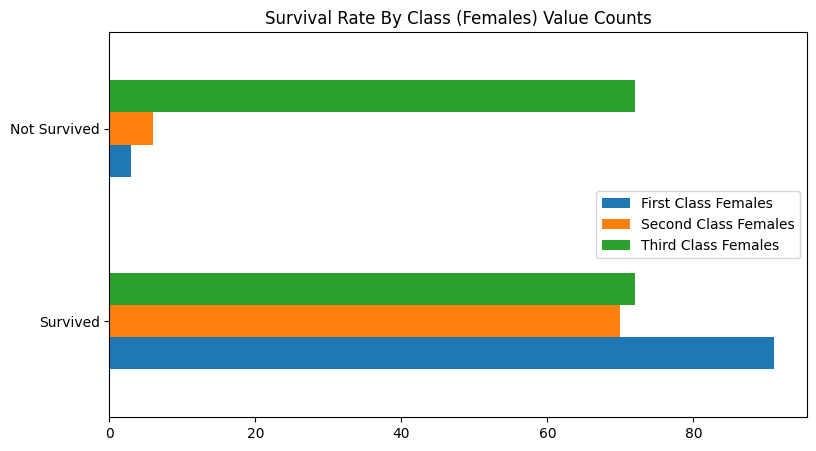

In [18]:
data_visualization_f.plot(kind='barh', figsize=(9,5), title="Survival Rate By Class (Females) Value Counts")

In [19]:
first_class_males = data.loc[(data["Pclass"]==1) & (data["Sex"]=='male')]
first_class_males.Survived.value_counts()

0    77
1    45
Name: Survived, dtype: int64

In [20]:
second_class_males = data.loc[(data["Pclass"]==2) & (data["Sex"]=='male')]
second_class_males.Survived.value_counts()

0    91
1    17
Name: Survived, dtype: int64

In [21]:
third_class_males = data.loc[(data["Pclass"]==3) & (data["Sex"]=='male')]
third_class_males.Survived.value_counts()

0    300
1     47
Name: Survived, dtype: int64

In [22]:
# creating DataFrame
data_visualization_m = pd.DataFrame({
    'First Class Males': [77, 45],
    'Second Class Males': [91, 17],
    'Third Class Males': [300, 47]
}, index=['Survived', 'Not Survived'])

In [23]:
data_visualization_m

,First Class Males,Second Class Males,Third Class Males
Survived,77,91,300
Not Survived,45,17,47


<Axes: title={'center': 'Survival Rate By Class (Males) Value Counts'}>

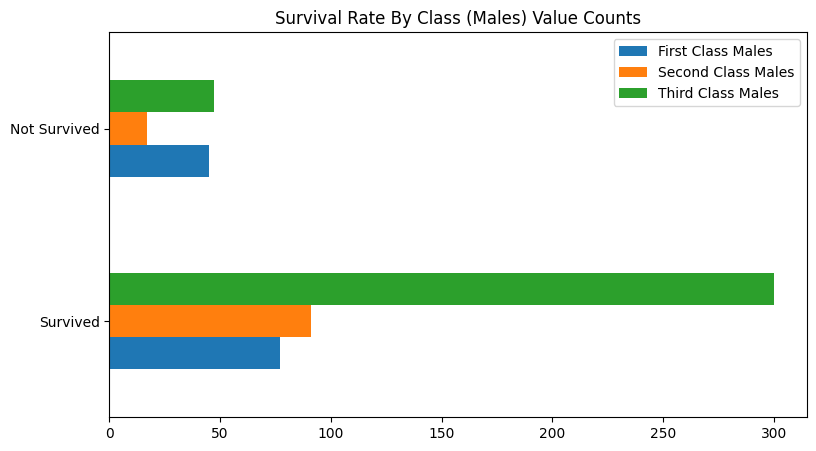

In [24]:
data_visualization_m.plot(kind='barh', figsize=(9,5), title="Survival Rate By Class (Males) Value Counts")

In [25]:
mean_survival_rate_by_class_gender = data.groupby(['Pclass', 'Sex'], dropna=False)['Survived'].agg(['mean'])

In [26]:
mean_survival_rate_by_class_gender

mean
Pclass Sex             
1      female  0.968085
       male    0.368852
2      female  0.921053
       male    0.157407
3      female  0.500000
       male    0.135447

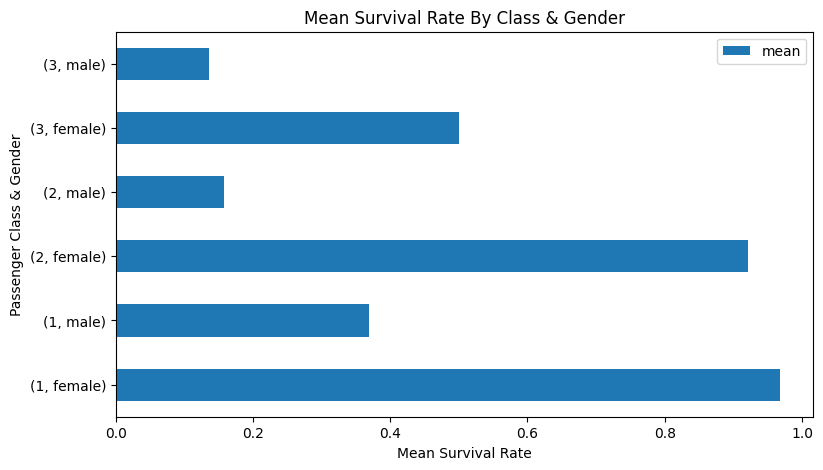

In [27]:
x = mean_survival_rate_by_class_gender.plot(kind='barh', figsize=(9,5))
x.set_title('Mean Survival Rate By Class & Gender')
x.set_xlabel('Mean Survival Rate')
x.set_ylabel('Passenger Class & Gender')
plt.show()

## Looking into Embarked column
- C = Cherbourg
- Q = Queenstown
- S = Southampton

In [28]:
data.Embarked.value_counts(dropna=False)

S      644
C      168
Q       77
NaN      2
Name: Embarked, dtype: int64

In [29]:
result = data[["Embarked", "Survived"]].groupby(["Embarked"], as_index=False).mean().sort_values(by="Survived")

In [30]:
result

,Embarked,Survived
2,S,0.336957
1,Q,0.389610
0,C,0.553571


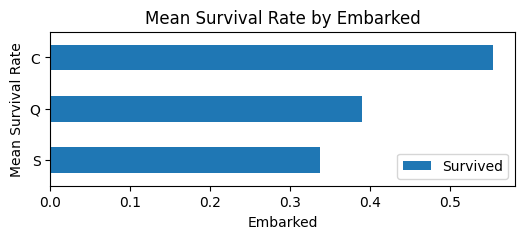

In [31]:
result.plot(x="Embarked", y="Survived", kind="barh", figsize=(6,2))
plt.title("Mean Survival Rate by Embarked")
plt.xlabel("Embarked")
plt.ylabel("Mean Survival Rate")
plt.show()

In [32]:
first_class_embarked_C = data.loc[(data["Pclass"]==1) & (data["Embarked"]=='C')]
first_class_embarked_C.Survived.value_counts()

1    59
0    26
Name: Survived, dtype: int64

In [33]:
second_class_embarked_C = data.loc[(data["Pclass"]==2) & (data["Embarked"]=='C')]
second_class_embarked_C.Survived.value_counts()

1    9
0    8
Name: Survived, dtype: int64

In [34]:
third_class_embarked_C = data.loc[(data["Pclass"]==3) & (data["Embarked"]=='C')]
third_class_embarked_C.Survived.value_counts()

0    41
1    25
Name: Survived, dtype: int64

In [35]:
first_class_embarked_S = data.loc[(data["Pclass"]==1) & (data["Embarked"]=='S')]
first_class_embarked_S.Survived.value_counts()

1    74
0    53
Name: Survived, dtype: int64

In [36]:
second_class_embarked_S = data.loc[(data["Pclass"]==2) & (data["Embarked"]=='S')]
second_class_embarked_S.Survived.value_counts()

0    88
1    76
Name: Survived, dtype: int64

In [37]:
third_class_embarked_S = data.loc[(data["Pclass"]==3) & (data["Embarked"]=='S')]
third_class_embarked_S.Survived.value_counts()

0    286
1     67
Name: Survived, dtype: int64

In [38]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## How many Nan values

In [39]:
# count percentage of nan values in each column
data.isna().sum()/len(data)*100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

### NaN values in column 'Embarked':


In [40]:
print(data['Embarked'].isna().sum())

2


In [41]:
data[data['Embarked'].isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


## How age affect survival rate

In [42]:
data.Age.agg(['min', 'max', 'mean'])

min      0.420000
max     80.000000
mean    29.699118
Name: Age, dtype: float64

#### Males:

In [43]:
males_filtered_data = data[(data['Sex'] == "male")]

In [44]:
males_filtered_data.groupby(['Survived'], dropna=True)['Age'].agg(['mean', 'min', 'max'])

,mean,min,max
Survived,,,
0,31.618056,1.00,74.0
1,27.276022,0.42,80.0


#### Females:

In [45]:
females_filtered_data = data[(data['Sex'] == "female")]

In [46]:
females_filtered_data.groupby(['Survived'], dropna=True)['Age'].agg(['mean', 'min', 'max'])

,mean,min,max
Survived,,,
0,25.046875,2.00,57.0
1,28.847716,0.75,63.0


## Survival by Family Size (SibSp + Parch = Family Size)

In [47]:
data['FamilySize'] = data['SibSp'] + data['Parch'] + 1 # the person is the plus 1

In [48]:
family_size_survival = data.groupby(['Survived', 'Sex'], dropna=True)['FamilySize'].agg(['mean', 'min', 'max'])

In [49]:
family_size_survival

mean  min  max
Survived Sex                       
0        female  3.246914    1   11
         male    1.647436    1   11
1        female  2.030043    1    7
         male    1.743119    1    7

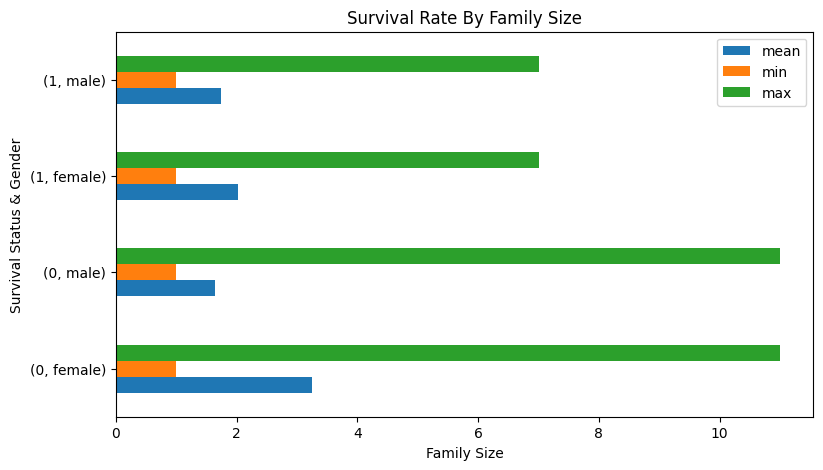

In [50]:
family_size = family_size_survival.plot(kind='barh', figsize=(9,5))
family_size.set_title('Survival Rate By Family Size')
family_size.set_xlabel('Family Size')
family_size.set_ylabel('Survival Status & Gender')
plt.show()

## Column "Fare"

In [51]:
data.Fare.agg(['mean', 'min', 'max'])

mean     32.204208
min       0.000000
max     512.329200
Name: Fare, dtype: float64

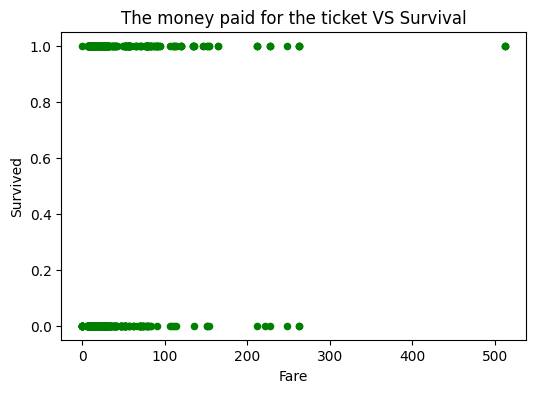

In [53]:
Fare = data.plot.scatter(x='Fare',
                        y= 'Survived',
                        title = ('The money paid for the ticket VS Survival'),
                        color='green',
                        figsize=(6,4))